Author: Wenqi Hu, Shanshan Liu

# define golbal variable

In [7]:
os.chdir(r'G:\Users\Hu Wenqi\Dropbox\Machine Learning Data\binary ')
s = 0.001
mu = 100
Niter = 500
k_list=[10,30,100,300]

# Analysis Data

## Gisette

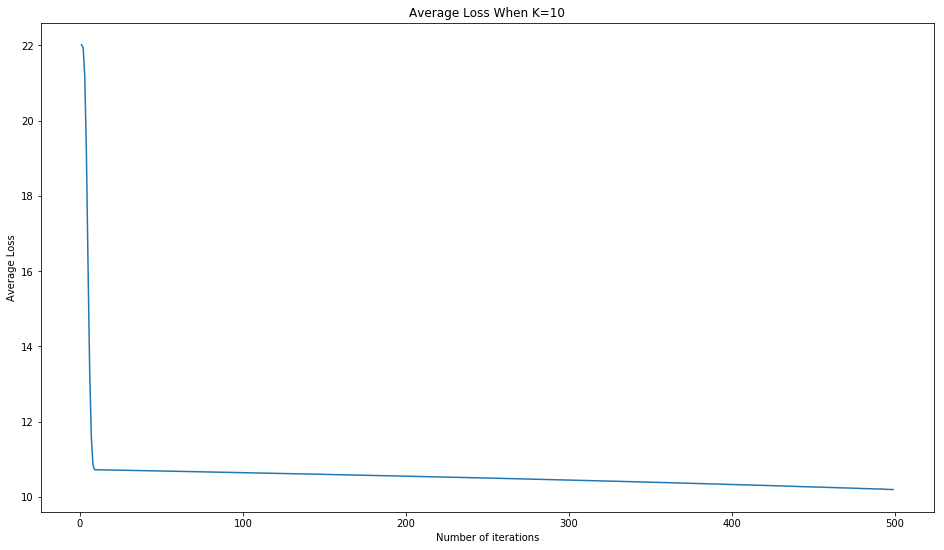

G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


                     10        30      100    300
train_err_rate  0.140333  0.147333  0.1475  0.136
 test_err_rate  0.151000  0.162000  0.1610  0.147


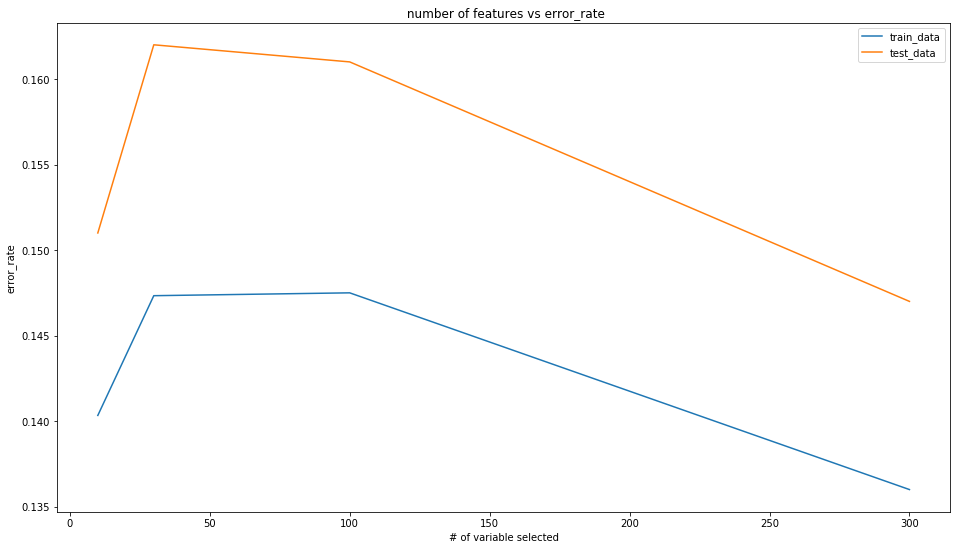

In [26]:
learning_rate=0.3
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file('Gisette\gisette')
droe_k(train_X_N,train_Y_N,Niter,mu,learning_rate,s,10)
calculate_err(k_list,train_X_N,train_Y_N,valid_X_N,valid_Y_N)

## Madelon

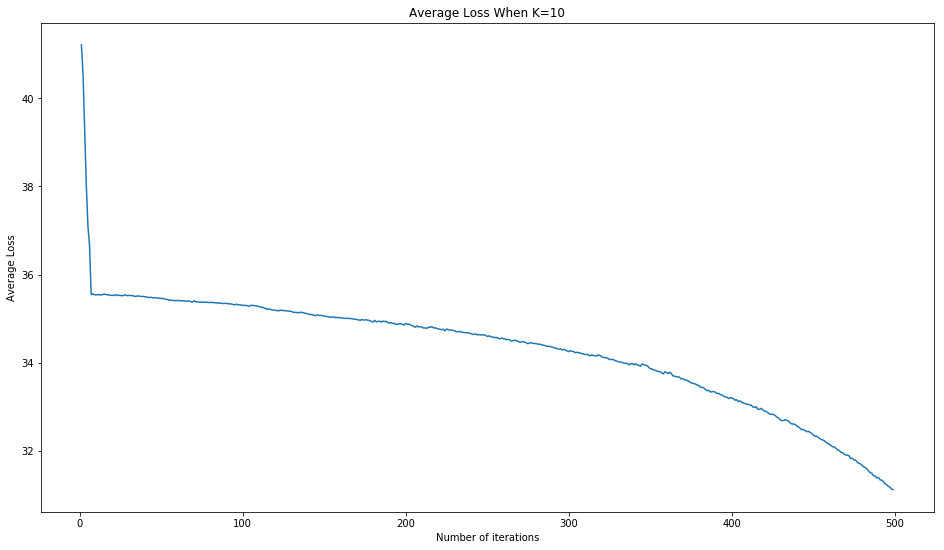

G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


                     10      30        100    300
train_err_rate  0.413500  0.3775  0.350500  0.333
 test_err_rate  0.418333  0.4100  0.403333  0.410


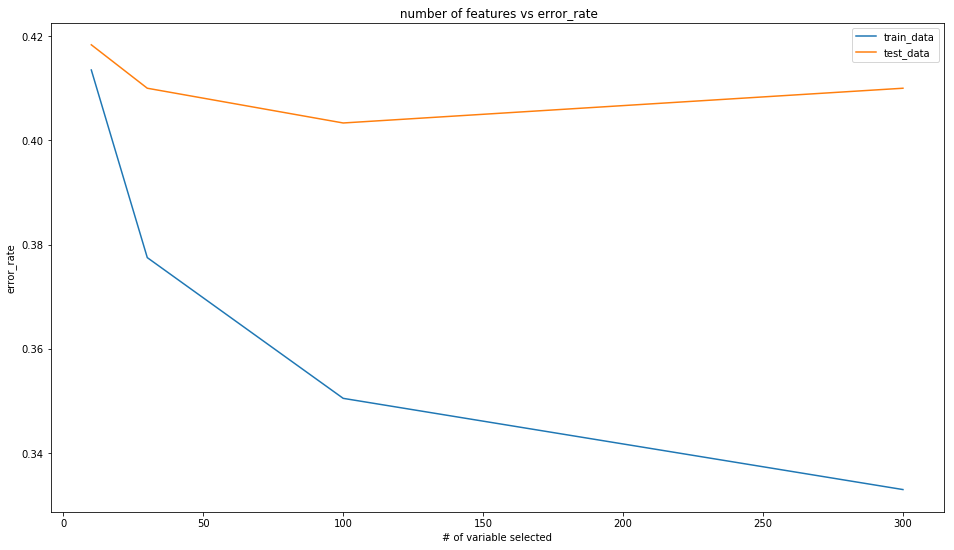

In [27]:
learning_rate=2.9
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file('MADELON\madelon')
droe_k(train_X_N,train_Y_N,Niter,mu,learning_rate,s,10)
calculate_err(k_list,train_X_N,train_Y_N,valid_X_N,valid_Y_N)

## Arcene

G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


                 10    30    100   300
train_err_rate  0.43  0.26  0.30  0.37
 test_err_rate  0.49  0.32  0.27  0.30


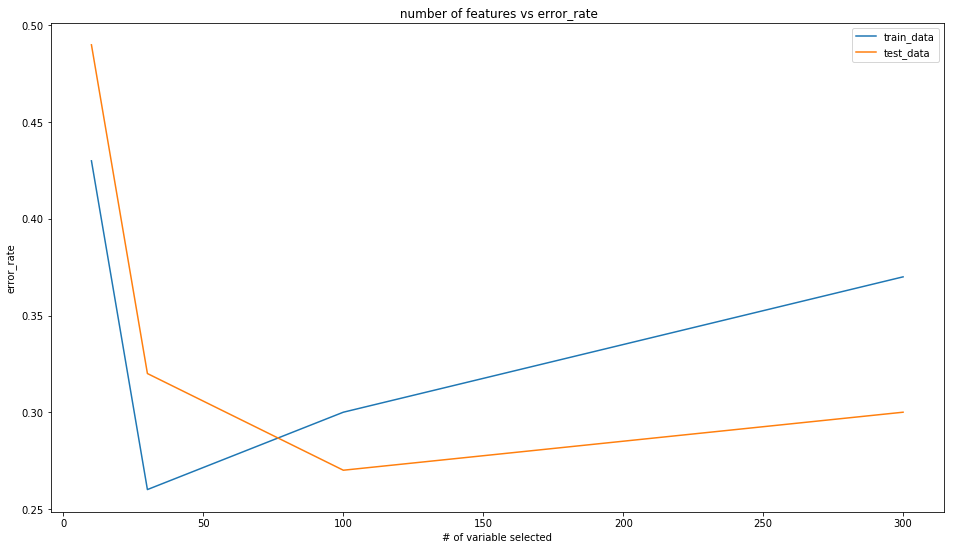

In [28]:
learning_rate=4
train_X_N,train_Y_N,valid_X_N,valid_Y_N=read_file(r'arcene\arcene')
calculate_err(k_list,train_X_N,train_Y_N,valid_X_N,valid_Y_N)

# Function

In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

def norm(X,Y):
    norm_X=(X-np.mean(X))/np.std(X)
    return np.nan_to_num(np.array(norm_X).T),np.array((Y+1)/2).T,np.mean(X),np.std(X)

def read_file(name):
    train_X=pd.read_csv(name+'_train.data',sep=' ',header=None)
    train_Y=pd.read_csv(name+'_train.labels',header=None).iloc[:,0]
    valid_X=pd.read_csv(name+'_valid.data',sep=' ',header=None)
    valid_Y=pd.read_csv(name+'_valid.labels',header=None).iloc[:,0]
    train_X=train_X.iloc[:,:-1]
    valid_X=valid_X.iloc[:,:-1]
    train_X_N,train_Y_N,mean_X,std_X=norm(train_X,train_Y)
    valid_X_N= np.nan_to_num(((valid_X-mean_X)/std_X).T)
    valid_Y_N=np.array((valid_Y+1)/2)
    return train_X_N,train_Y_N,valid_X_N,valid_Y_N

def initiallize(X):
    m,n_x=X.shape
    W=np.zeros(m)/100
    return W


def forward(X,W):
    Z=np.dot(W,X)
    A=np.longfloat(1/(1+np.exp(-Z)))
    return A

def backward(W,X,Y,S):
    Z=Y*np.dot(W,X)
    dL=2*(Z-1)/(1+(Z-1)**2)
    dW=np.dot(X,dL*(dL<1)*Y)-S*W
    return dW

def calculate_M(M_prev,k,Niter,mu,i):
    M=k+(M_prev-k)*max(0,(Niter-2*i)/(2*i*mu+Niter))
    return M

def calculate_Loss(W,X,Y,s):
    Z=Y*np.dot(W,X)
    loss=(1/len(W))*(sum(np.log(1+(Z-1)**2))+s*np.linalg.norm(W)**2)
    return loss

def update_parameters(X,Y,Niter,mu,learning_rate,s,k):
    W=initiallize(X)
    M=W.shape[0]
    for i in range(1,Niter):
        temp_W=np.array(W)
        M=calculate_M(M,k,Niter,mu,i)
        dW=backward(temp_W,X,Y,s)
        temp_W_1=temp_W-learning_rate*dW
        W=temp_W_1*((temp_W_1**2)>(np.sort(temp_W_1**2)[::-1][int(M)]))
        loss=calculate_Loss(W,X,Y,s)
    return W
def droe_k(X,Y,Niter,mu,learning_rate,s,k):
    W=initiallize(X)
    M=W.shape[0]
    loss_form=[]
    for i in range(1,Niter):
        temp_W=np.array(W)
        M=calculate_M(M,k,Niter,mu,i)
        dW=backward(temp_W,X,Y,s)
        temp_W_1=temp_W-learning_rate*dW
        W=temp_W_1*((temp_W_1**2)>(np.sort(temp_W_1**2)[::-1][int(M)]))
        loss=calculate_Loss(W,X,Y,s)
        loss_form.append(loss)
    plt.figure(figsize=(16,9)) 
    plt.plot(range(1,Niter),loss_form)
    plt.title('Average Loss When K=10')
    plt.xlabel('Number of iterations')
    plt.ylabel('Average Loss')
    plt.show()


def prediction(W,X,Y):
    A=forward(X,W)
    Y_hat=A>0.5
    return sum(np.abs(Y_hat-Y))/Y.shape[0]

def calculate_err(k_list,train_X,train_Y,test_X,test_Y):
    train_err_rate=[]
    test_err_rate=[]
    for k in k_list:
        W=update_parameters(train_X,train_Y,Niter,mu,learning_rate,s,k)
        train_err=prediction(W,train_X,train_Y)
        test_err = prediction(W,test_X,test_Y)
        train_err_rate.append(train_err)
        test_err_rate.append(test_err)
    print(pd.DataFrame([train_err_rate,test_err_rate],columns=k_list,index=['train_err_rate',' test_err_rate']))
    return plot_result(train_err_rate,test_err_rate,k_list)

def plot_result(train_err_rate,pred_err_rate,k_list):
    plt.figure(figsize=(16,9))  
    plt.plot(k_list,train_err_rate)
    plt.plot(k_list,pred_err_rate)
    plt.title(' number of features vs error_rate')
    plt.xlabel('# of variable selected')
    plt.ylabel('error_rate')
    plt.legend(['train_data','test_data'])
    plt.show()